# Exploring Natural Language Processing (NLT) with NLTK Package
### References:
* https://realpython.com/nltk-nlp-python/
* https://realpython.com/python-nltk-sentiment-analysis/
* https://www.nltk.org/book/

# Natural Language Processing (NLP) with Python's NLTK 
* Reference: https://realpython.com/nltk-nlp-python

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from pprint import pp

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, SnowballStemmer, WordNetLemmatizer
from nltk import FreqDist
from nltk.sentiment import SentimentIntensityAnalyzer
from random import shuffle
from statistics import mean

from sklearn.naive_bayes import (
    BernoulliNB,
    ComplementNB,
    MultinomialNB,
)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [2]:
NLTK_RESOURCES_TO_DOWNLOAD = [
    "names", "stopwords",
    "words", "state_union", "twitter_samples", "movie_reviews", "book",
    "maxent_ne_chunker", 
    "averaged_perceptron_tagger", "vader_lexicon", "punkt",
]
nltk.download(NLTK_RESOURCES_TO_DOWNLOAD)

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\Jeff\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jeff\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Jeff\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package state_union to
[nltk_data]     C:\Users\Jeff\AppData\Roaming\nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\Jeff\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Jeff\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading collection 'bo

True

In [3]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


## Tokenizing by Word, by Sentence

In [4]:
example_string = """
Muad'Dib learned rapidly because his first training was in how to learn.
And the first lesson of all was the basic trust that he could learn.
It's shocking to find how many people do not believe they can learn,
and how many more believe learning to be difficult."""

In [5]:
sent_tokenize(example_string)

["\nMuad'Dib learned rapidly because his first training was in how to learn.",
 'And the first lesson of all was the basic trust that he could learn.',
 "It's shocking to find how many people do not believe they can learn,\nand how many more believe learning to be difficult."]

In [6]:
print( word_tokenize(example_string) )

["Muad'Dib", 'learned', 'rapidly', 'because', 'his', 'first', 'training', 'was', 'in', 'how', 'to', 'learn', '.', 'And', 'the', 'first', 'lesson', 'of', 'all', 'was', 'the', 'basic', 'trust', 'that', 'he', 'could', 'learn', '.', 'It', "'s", 'shocking', 'to', 'find', 'how', 'many', 'people', 'do', 'not', 'believe', 'they', 'can', 'learn', ',', 'and', 'how', 'many', 'more', 'believe', 'learning', 'to', 'be', 'difficult', '.']


## Filtering Stop Words

In [7]:
worf_quote = "Sir, I protest. I am not a merry man!"
words_in_quote = word_tokenize(worf_quote)
print(words_in_quote)

['Sir', ',', 'I', 'protest', '.', 'I', 'am', 'not', 'a', 'merry', 'man', '!']


In [8]:
stop_words = set( stopwords.words("english") )
len(stop_words)
print(sorted(stop_words)[:300])

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "shouldn't", 'so', 'some',

In [9]:
filtered_list = [ w for w in words_in_quote if w.casefold() not in stop_words ]
print(filtered_list)

['Sir', ',', 'protest', '.', 'merry', 'man', '!']


## Stemming by PorterStemmer

In [10]:
string_for_stemming = """
The crew of the USS Discovery discovered many discoveries.
Discovering is what explorers do."""

In [11]:
words = word_tokenize(string_for_stemming)
print(words)

['The', 'crew', 'of', 'the', 'USS', 'Discovery', 'discovered', 'many', 'discoveries', '.', 'Discovering', 'is', 'what', 'explorers', 'do', '.']


In [12]:
stemmer = PorterStemmer()
stemmed_words = [ stemmer.stem(w) for w in words ]
print(stemmed_words)

['the', 'crew', 'of', 'the', 'uss', 'discoveri', 'discov', 'mani', 'discoveri', '.', 'discov', 'is', 'what', 'explor', 'do', '.']


In [13]:
stemmer = SnowballStemmer("english")
stemmed_words = [ stemmer.stem(w) for w in words ]
print(stemmed_words)

['the', 'crew', 'of', 'the', 'uss', 'discoveri', 'discov', 'mani', 'discoveri', '.', 'discov', 'is', 'what', 'explor', 'do', '.']


## Tagging Parts of Speech

In [14]:
sagan_quote = """
If you wish to make an apple pie from scratch,
you must first invent the universe."""

In [15]:
words_in_sagan_quote = word_tokenize( sagan_quote )
print(words_in_sagan_quote)

['If', 'you', 'wish', 'to', 'make', 'an', 'apple', 'pie', 'from', 'scratch', ',', 'you', 'must', 'first', 'invent', 'the', 'universe', '.']


In [16]:
sagan_pos = nltk.pos_tag(words_in_sagan_quote)
print( sagan_pos )

[('If', 'IN'), ('you', 'PRP'), ('wish', 'VBP'), ('to', 'TO'), ('make', 'VB'), ('an', 'DT'), ('apple', 'NN'), ('pie', 'NN'), ('from', 'IN'), ('scratch', 'NN'), (',', ','), ('you', 'PRP'), ('must', 'MD'), ('first', 'VB'), ('invent', 'VB'), ('the', 'DT'), ('universe', 'NN'), ('.', '.')]


In [17]:
sagan_df = pd.DataFrame( sagan_pos, columns=['word','pos'])
sagan_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
word,If,you,wish,to,make,an,apple,pie,from,scratch,",",you,must,first,invent,the,universe,.
pos,IN,PRP,VBP,TO,VB,DT,NN,NN,IN,NN,",",PRP,MD,VB,VB,DT,NN,.


In [18]:
# Load the tagset help text
TAGSET_FILEN = r"C:\Users\Jeff\AppData\Roaming\nltk_data\help\tagsets\upenn_tagset.pickle"
tagset_dict = pickle.load( open(TAGSET_FILEN, 'rb') )
len(tagset_dict)

45

In [19]:
tagset_df = pd.DataFrame( tagset_dict, index=['pos_desc', 'example'] ).T\
                .sort_index(ignore_index=False)\
                .reset_index(drop=False)\
                .rename(columns={'index':'pos'})
tagset_df.head()

,pos,pos_desc,example
0,$,dollar,$ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
1,'',closing quotation mark,' ''
2,(,opening parenthesis,( [ {
3,),closing parenthesis,) ] }
4,",",comma,","


In [20]:
tagset_df[ tagset_df.pos_desc.str.lower().str.contains('noun') ]

,pos,pos_desc,example
19,NN,"noun, common, singular or mass",common-carrier cabbage knuckle-duster Casino a...
20,NNP,"noun, proper, singular",Motown Venneboerger Czestochwa Ranzer Conchita...
21,NNPS,"noun, proper, plural",Americans Americas Amharas Amityvilles Amuseme...
22,NNS,"noun, common, plural",undergraduates scotches bric-a-brac products b...
25,PRP,"pronoun, personal",hers herself him himself hisself it itself me ...
26,PRP$,"pronoun, possessive",her his mine my our ours their thy your
41,WP,WH-pronoun,that what whatever whatsoever which who whom w...
42,WP$,"WH-pronoun, possessive",whose


In [21]:
sagan_df.merge( tagset_df[['pos', 'pos_desc']], on='pos', how='left', suffixes=['', '_desc'])

,word,pos,pos_desc
0,If,IN,"preposition or conjunction, subordinating"
1,you,PRP,"pronoun, personal"
2,wish,VBP,"verb, present tense, not 3rd person singular"
3,to,TO,"""to"" as preposition or infinitive marker"
4,make,VB,"verb, base form"
5,an,DT,determiner
6,apple,NN,"noun, common, singular or mass"
7,pie,NN,"noun, common, singular or mass"
8,from,IN,"preposition or conjunction, subordinating"
9,scratch,NN,"noun, common, singular or mass"


In [22]:
jabberwocky_excerpt = """
'Twas brillig, and the slithy toves did gyre and gimble in the wabe:
all mimsy were the borogoves, and the mome raths outgrabe."""
words_in_excerpt = word_tokenize( jabberwocky_excerpt )
print( words_in_excerpt )

["'Twas", 'brillig', ',', 'and', 'the', 'slithy', 'toves', 'did', 'gyre', 'and', 'gimble', 'in', 'the', 'wabe', ':', 'all', 'mimsy', 'were', 'the', 'borogoves', ',', 'and', 'the', 'mome', 'raths', 'outgrabe', '.']


In [23]:
j_pos_dict = nltk.pos_tag( words_in_excerpt )
j_pos_df = pd.DataFrame( j_pos_dict, columns=['word','pos'])
j_pos_df.merge( tagset_df[['pos', 'pos_desc']], on='pos', how='left', suffixes=['', '_desc'])

,word,pos,pos_desc
0,'Twas,CD,"numeral, cardinal"
1,brillig,NN,"noun, common, singular or mass"
2,",",",",comma
3,and,CC,"conjunction, coordinating"
4,the,DT,determiner
5,slithy,JJ,"adjective or numeral, ordinal"
6,toves,NNS,"noun, common, plural"
7,did,VBD,"verb, past tense"
8,gyre,NN,"noun, common, singular or mass"
9,and,CC,"conjunction, coordinating"


## Lemmatizing

In [24]:
lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize("scarves")

'scarf'

In [25]:
string_for_lemmatizing = "The friends of DeSoto love scarves."
words = word_tokenize(string_for_lemmatizing)
print( words )

['The', 'friends', 'of', 'DeSoto', 'love', 'scarves', '.']


In [26]:
lemmatized_words = [ lemmatizer.lemmatize(w) for w in words ]
print(lemmatized_words)

['The', 'friend', 'of', 'DeSoto', 'love', 'scarf', '.']


In [27]:
lemmatizer.lemmatize("worst")

'worst'

In [28]:
lemmatizer.lemmatize("worst", "a" )

'bad'

## Chunking: Identify phrases

In [29]:
lotr_quote = "It's a dangerous business, Frodo, going out your door."
words_in_lotr_quote = word_tokenize(lotr_quote)
print(words_in_lotr_quote)

['It', "'s", 'a', 'dangerous', 'business', ',', 'Frodo', ',', 'going', 'out', 'your', 'door', '.']


In [30]:
lotr_pos_tags = nltk.pos_tag(words_in_lotr_quote)
print(lotr_pos_tags)

[('It', 'PRP'), ("'s", 'VBZ'), ('a', 'DT'), ('dangerous', 'JJ'), ('business', 'NN'), (',', ','), ('Frodo', 'NNP'), (',', ','), ('going', 'VBG'), ('out', 'RP'), ('your', 'PRP$'), ('door', 'NN'), ('.', '.')]


In [31]:
grammar = "NP: {<DT>?<JJ>*<NN>}"
print(grammar)

NP: {<DT>?<JJ>*<NN>}


In [32]:
chunk_parser = nltk.RegexpParser(grammar)

In [33]:
tree = chunk_parser.parse(lotr_pos_tags)
pp(tree)

Tree('S', [('It', 'PRP'), ("'s", 'VBZ'), Tree('NP', [('a', 'DT'), ('dangerous', 'JJ'), ('business', 'NN')]), (',', ','), ('Frodo', 'NNP'), (',', ','), ('going', 'VBG'), ('out', 'RP'), ('your', 'PRP$'), Tree('NP', [('door', 'NN')]), ('.', '.')])


## Chinking: Patterns to exclude as a phrase

In [34]:
print(lotr_pos_tags)

[('It', 'PRP'), ("'s", 'VBZ'), ('a', 'DT'), ('dangerous', 'JJ'), ('business', 'NN'), (',', ','), ('Frodo', 'NNP'), (',', ','), ('going', 'VBG'), ('out', 'RP'), ('your', 'PRP$'), ('door', 'NN'), ('.', '.')]


In [35]:
grammar = """
Chunk: {<.*>+}
       }<JJ>{"""

In [36]:
chunk_parser = nltk.RegexpParser(grammar)
tree = chunk_parser.parse(lotr_pos_tags)
pp(tree)

Tree('S', [Tree('Chunk', [('It', 'PRP'), ("'s", 'VBZ'), ('a', 'DT')]), ('dangerous', 'JJ'), Tree('Chunk', [('business', 'NN'), (',', ','), ('Frodo', 'NNP'), (',', ','), ('going', 'VBG'), ('out', 'RP'), ('your', 'PRP$'), ('door', 'NN'), ('.', '.')])])


## Named Entity Recognition (NER)

In [37]:
print(lotr_pos_tags)

[('It', 'PRP'), ("'s", 'VBZ'), ('a', 'DT'), ('dangerous', 'JJ'), ('business', 'NN'), (',', ','), ('Frodo', 'NNP'), (',', ','), ('going', 'VBG'), ('out', 'RP'), ('your', 'PRP$'), ('door', 'NN'), ('.', '.')]


In [38]:
tree = nltk.ne_chunk(lotr_pos_tags)
pp(tree)

Tree('S', [('It', 'PRP'), ("'s", 'VBZ'), ('a', 'DT'), ('dangerous', 'JJ'), ('business', 'NN'), (',', ','), Tree('PERSON', [('Frodo', 'NNP')]), (',', ','), ('going', 'VBG'), ('out', 'RP'), ('your', 'PRP$'), ('door', 'NN'), ('.', '.')])


In [39]:
tree = nltk.ne_chunk(lotr_pos_tags, binary=True)
pp(tree)

Tree('S', [('It', 'PRP'), ("'s", 'VBZ'), ('a', 'DT'), ('dangerous', 'JJ'), ('business', 'NN'), (',', ','), Tree('NE', [('Frodo', 'NNP')]), (',', ','), ('going', 'VBG'), ('out', 'RP'), ('your', 'PRP$'), ('door', 'NN'), ('.', '.')])


In [40]:
quote = """
Men like Schiaparelli watched the red planet—it is odd, by-the-bye, that
for countless centuries Mars has been the star of war—but failed to
interpret the fluctuating appearances of the markings they mapped so well.
All that time the Martians must have been getting ready.

During the opposition of 1894 a great light was seen on the illuminated
part of the disk, first at the Lick Observatory, then by Perrotin of Nice,
and then by other observers. English readers heard of it first in the
issue of Nature dated August 2."""

In [41]:
def extract_ne(quote):
    words = word_tokenize(quote, language="english")
    tags = nltk.pos_tag(words)
    tree = nltk.ne_chunk(tags, binary=True)
    return set(
        " ".join(i[0] for i in t)
        for t in tree
        if hasattr(t, "label") and t.label() == "NE"
    )

In [42]:
extract_ne(quote)

{'Lick Observatory', 'Mars', 'Nature', 'Perrotin', 'Schiaparelli'}

## Getting Text to Analyze

In [43]:
print( dir(text8) )

['_CONTEXT_RE', '_COPY_TOKENS', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_context', '_train_default_ngram_lm', 'collocation_list', 'collocations', 'common_contexts', 'concordance', 'concordance_list', 'count', 'dispersion_plot', 'findall', 'generate', 'index', 'name', 'plot', 'readability', 'similar', 'tokens', 'vocab']


In [44]:
text8.concordance('man')

Displaying 14 of 14 matches:
 to hearing from you all . ABLE young man seeks , sexy older women . Phone for 
ble relationship . GENUINE ATTRACTIVE MAN 40 y . o ., no ties , secure , 5 ft .
ship , and quality times . VIETNAMESE MAN Single , never married , financially 
ip . WELL DRESSED emotionally healthy man 37 like to meet full figured woman fo
 nth subs LIKE TO BE MISTRESS of YOUR MAN like to be treated well . Bold DTE no
eeks lady in similar position MARRIED MAN 50 , attrac . fit , seeks lady 40 - 5
eks nice girl 25 - 30 serious rship . Man 46 attractive fit , assertive , and k
 40 - 50 sought by Aussie mid 40s b / man f / ship r / ship LOVE to meet widowe
discreet times . Sth E Subs . MARRIED MAN 42yo 6ft , fit , seeks Lady for discr
woman , seeks professional , employed man , with interests in theatre , dining 
 tall and of large build seeks a good man . I am a nonsmoker , social drinker ,
lead to relationship . SEEKING HONEST MAN I am 41 y . o ., 5 ft . 4 , med . bui
 quiet time

In [45]:
text8.concordance('woman')

Displaying 11 of 11 matches:
at home . Seeking an honest , caring woman , slim or med . build , who enjoys t
thy man 37 like to meet full figured woman for relationship . 48 slim , shy , S
rry . MALE 58 years old . Is there a Woman who would like to spend 1 weekend a 
 other interests . Seeking Christian Woman for fship , view to rship . SWM 45 D
ALE 60 - burly beared seeks intimate woman for outings n / s s / d F / ston / P
ington . SCORPIO 47 seeks passionate woman for discreet intimate encounters SEX
le dad . 42 , East sub . 5 " 9 seeks woman 30 + for f / ship relationship TALL 
personal trainer looking for married woman age open for fun MARRIED Dark guy 37
rinker , seeking slim - medium build woman who is happy in life , age open . AC
. O . TERTIARY Educated professional woman , seeks professional , employed man 
 real romantic , age 50 - 65 y . o . WOMAN OF SUBSTANCE 56 , 59 kg ., 50 , fit 


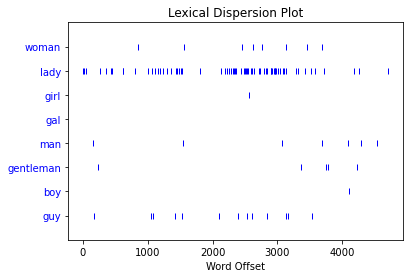

In [46]:
text8.dispersion_plot(['woman', 'lady', 'girl', 'gal', 'man', 'gentleman', 'boy', 'guy'])

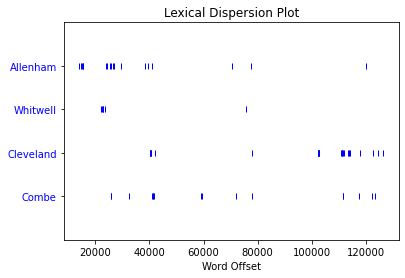

In [47]:
text2.dispersion_plot(["Allenham", "Whitwell", "Cleveland", "Combe"])

## Making a Frequency Distribution

In [48]:
frequency_distribution = FreqDist(text8)
print(frequency_distribution)

<FreqDist with 1108 samples and 4867 outcomes>


In [49]:
frequency_distribution.most_common(20)

[(',', 539),
 ('.', 353),
 ('/', 110),
 ('for', 99),
 ('and', 74),
 ('to', 74),
 ('lady', 68),
 ('-', 66),
 ('seeks', 60),
 ('a', 52),
 ('with', 44),
 ('S', 36),
 ('ship', 33),
 ('&', 30),
 ('relationship', 29),
 ('fun', 28),
 ('in', 27),
 ('slim', 27),
 ('build', 27),
 ('o', 26)]

In [50]:
meaningful_words = [ w for w in text8 if w.casefold() not in stop_words ]
len(meaningful_words)

4018

In [51]:
frequency_distribution = FreqDist(meaningful_words)
print(frequency_distribution)

<FreqDist with 997 samples and 4018 outcomes>


In [52]:
frequency_distribution.most_common(20)

[(',', 539),
 ('.', 353),
 ('/', 110),
 ('lady', 68),
 ('-', 66),
 ('seeks', 60),
 ('ship', 33),
 ('&', 30),
 ('relationship', 29),
 ('fun', 28),
 ('slim', 27),
 ('build', 27),
 ('smoker', 23),
 ('50', 23),
 ('non', 22),
 ('movies', 22),
 ('good', 21),
 ('honest', 20),
 ('dining', 19),
 ('rship', 18)]

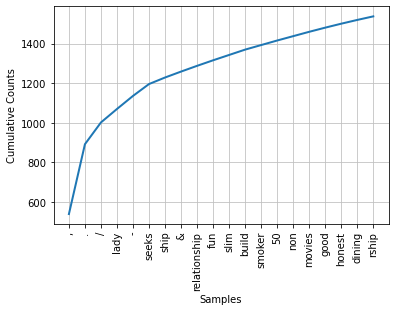

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [53]:
frequency_distribution.plot(20, cumulative=True)

## Finding Collocations

In [54]:
text8.collocations()

would like; medium build; social drinker; quiet nights; non smoker;
long term; age open; Would like; easy going; financially secure; fun
times; similar interests; Age open; weekends away; poss rship; well
presented; never married; single mum; permanent relationship; slim
build


In [55]:
lemmatized_words = [ lemmatizer.lemmatize(w) for w in text8 ]
new_text = nltk.Text(lemmatized_words)
new_text.collocations()

medium build; social drinker; non smoker; quiet night; long term;
would like; age open; easy going; financially secure; Would like; fun
time; similar interest; Age open; weekend away; well presented; never
married; single mum; permanent relationship; year old; slim build


# Sentiment Analysis
* Reference: https://realpython.com/python-nltk-sentiment-analysis/

## Compiling Data

In [56]:
words = [ w for w in nltk.corpus.state_union.words() if w.isalpha() ]
len(words)

350715

In [57]:
stopwords = nltk.corpus.stopwords.words("english")
len(stopwords)

179

In [58]:
words = [ w for w in words if w.lower() not in stopwords ]
len(words)

180589

In [59]:
text_short = """
For some quick analysis, creating a corpus could be overkill.
If all you need is a word list,
there are simpler ways to achieve that goal."""
pp(nltk.word_tokenize(text_short), width=79, compact=True)

['For', 'some', 'quick', 'analysis', ',', 'creating', 'a', 'corpus', 'could',
 'be', 'overkill', '.', 'If', 'all', 'you', 'need', 'is', 'a', 'word', 'list',
 ',', 'there', 'are', 'simpler', 'ways', 'to', 'achieve', 'that', 'goal', '.']


## Creating Frequency Distributions

In [60]:
# words: list[str] = nltk.word_tokenize(text_short)
# words = nltk.word_tokenize(text_short)
fd = nltk.FreqDist( words )
fd

FreqDist({'must': 1568, 'people': 1291, 'world': 1128, 'year': 1097, 'America': 1076, 'us': 1049, 'new': 1049, 'Congress': 1014, 'years': 827, 'American': 784, ...})

In [61]:
fd.most_common(3)

[('must', 1568), ('people', 1291), ('world', 1128)]

In [62]:
fd.tabulate(10)

    must   people    world     year  America       us      new Congress    years American 
    1568     1291     1128     1097     1076     1049     1049     1014      827      784 


In [63]:
fd["America"]

1076

In [64]:
fd["america"]  # Note this doesn't result in a KeyError

0

In [65]:
fd["AMERICA"]

3

In [66]:
fd.tabulate(10)

    must   people    world     year  America       us      new Congress    years American 
    1568     1291     1128     1097     1076     1049     1049     1014      827      784 


In [67]:
lower_fd = nltk.FreqDist( [ w.lower() for w in words ] )
lower_fd.tabulate(10)

      must     people      world        new       year    america   congress         us government      years 
      1569       1313       1213       1112       1104       1079       1078       1049        969        829 


## Extracting Concordance and Collocations

In [68]:
text = nltk.Text( nltk.corpus.state_union.words() )
text.concordance("america", lines=5)

Displaying 5 of 1079 matches:
 would want us to do . That is what America will do . So much blood has already
ay , the entire world is looking to America for enlightened leadership to peace
beyond any shadow of a doubt , that America will continue the fight for freedom
 to make complete victory certain , America will never become a party to any pl
nly in law and in justice . Here in America , we have labored long and hard to 


In [69]:
concordance_list = text.concordance_list("america", lines=2)
for entry in concordance_list:
    print(entry.line)

 would want us to do . That is what America will do . So much blood has already
ay , the entire world is looking to America for enlightened leadership to peace


In [70]:
words = nltk.word_tokenize(
    """Beautiful is better than ugly.
    Explicit is better than implicit.
    Simple is better than complex."""
)
text = nltk.Text(words)
fd = text.vocab()  # Equivalent to fd = nltk.FreqDist(words)
fd.tabulate(3)

    is better   than 
     3      3      3 


In [71]:
words = [ w for w in nltk.corpus.state_union.words() if w.isalpha() ]
finder = nltk.collocations.TrigramCollocationFinder.from_words(words)

In [72]:
finder.ngram_fd.most_common(5)

[(('the', 'United', 'States'), 294),
 (('the', 'American', 'people'), 185),
 (('of', 'the', 'world'), 154),
 (('of', 'the', 'United'), 145),
 (('to', 'the', 'Congress'), 139)]

In [73]:
finder.ngram_fd.tabulate(5)

  ('the', 'United', 'States') ('the', 'American', 'people')        ('of', 'the', 'world')       ('of', 'the', 'United')     ('to', 'the', 'Congress') 
                          294                           185                           154                           145                           139 


## Using NLTK's Pre-Trained Sentiment Analyzer: VADER (**V**alence **A**ware **D**ictionary and s**E**ntiment **R**easoner)

In [74]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("Wow, NLTK is really powerful!")

{'neg': 0.0, 'neu': 0.295, 'pos': 0.705, 'compound': 0.8012}

In [75]:
tweets = [ t.replace("://", "//") for t in nltk.corpus.twitter_samples.strings() ]
tweets[:10]

['hopeless for tmr :(',
 "Everything in the kids section of IKEA is so cute. Shame I'm nearly 19 in 2 months :(",
 '@Hegelbon That heart sliding into the waste basket. :(',
 '“@ketchBurning: I hate Japanese call him "bani" :( :(”\n\nMe too',
 'Dang starting next week I have "work" :(',
 "oh god, my babies' faces :( https//t.co/9fcwGvaki0",
 '@RileyMcDonough make me smile :((',
 '@f0ggstar @stuartthull work neighbour on motors. Asked why and he said hates the updates on search :( http//t.co/XvmTUikWln',
 'why?:("@tahuodyy: sialan:( https//t.co/Hv1i0xcrL2"',
 'Athabasca glacier was there in #1948 :-( #athabasca #glacier #jasper #jaspernationalpark #alberta #explorealberta #… http//t.co/dZZdqmf7Cz']

In [76]:
def is_positive(tweet: str) -> bool:
    """True if tweet has positive compound sentiment, False otherwise"""
    return sia.polarity_scores(tweet)["compound"] > 0

In [77]:
shuffle(tweets)
for tweet in tweets[:10]:
    print(">", is_positive(tweet), tweet)

> True RT @ohis_: Ed Miliband rules out any kind of deal with Scottish National Party after the election http//t.co/Ee1H6CkLIi http//t.co/uV4alZ…
> True @Rigan_s @HakubiRedwinter b-but, my favorite thing about gintama is the shinsengumi special chapters :(
> False Cameron y Miliband apelan a los indecisos a una semana de elecciones http//t.co/2zjXviLrCA #SiguemeYTeSigo
> True @DeniseDenise__  Good morning #hotnsexy girl. Have an amazing #friskyfriday on the beach :D
> True RT @JimForScotland: Labour has called SNP bluff. The SNP must now be clear: are they willing to prevent or bring down a Labour government &amp;…
> False RT @schofieldkevin: Don't think I can picture Ed Miliband on the world stage. What if he fell off?
> True @KristophCajon I have a trip to philly in December so after that :) I'd love to come out there dude.
> True RT @Tommy_Colc: Financial Times come out in support of Tories claiming Miliband is "preoccupied w/ inequality". The man who wrote it http:/…
> True Milliba

In [78]:
positive_review_ids = nltk.corpus.movie_reviews.fileids( categories=['pos'])
negative_review_ids = nltk.corpus.movie_reviews.fileids( categories=['neg'])
all_review_ids = positive_review_ids + negative_review_ids
print( len(all_review_ids) )
all_review_ids[:5]

2000


['pos/cv000_29590.txt',
 'pos/cv001_18431.txt',
 'pos/cv002_15918.txt',
 'pos/cv003_11664.txt',
 'pos/cv004_11636.txt']

In [79]:
def is_positive(review_id: str) -> bool:
    """True if the average of all sentence compound scores is positive"""
    text = nltk.corpus.movie_reviews.raw(review_id)
    scores = [ sia.polarity_scores(sentence)["compound"] for sentence in nltk.sent_tokenize(text) ]
    return mean(scores) > 0

In [80]:
shuffle(all_review_ids)
correct=0
for review_id in all_review_ids:
    if is_positive(review_id):
        if review_id in positive_review_ids:
            correct += 1

    else:
        if review_id in negative_review_ids:
            correct += 1

print(f"{correct / len(all_review_ids):.2%} correct")

64.00% correct


## Customizing NLTK’s Sentiment Analysis

### Selecting Useful Features

In [81]:
print( nltk.corpus.movie_reviews.categories() )

['neg', 'pos']


In [82]:
# Extracting the top 100 positive and top 100 negative words to use
# as potential features for training an ML model
unwanted = nltk.corpus.stopwords.words("english")
unwanted.extend( [ w.lower() for w in nltk.corpus.names.words() ] )
print( len(unwanted) )
def skip_unwanted(pos_tuple):
    word, tag = pos_tuple
    if not word.isalpha() or word in unwanted:
        return False
    if tag.startswith("NN"):
        return False
    return True

8123


In [83]:
positive_words = [ w for w, tag in filter(
    skip_unwanted,
    nltk.pos_tag( nltk.corpus.movie_reviews.words( categories=['pos']))
    )]

In [84]:
negative_words = [ w for w, tag in filter(
    skip_unwanted,
    nltk.pos_tag( nltk.corpus.movie_reviews.words( categories=['neg']))
    )]
print( len(positive_words), len(negative_words) )

174734 156310


In [85]:
# Frequency distribution of positive and negative words (as dictionaries)
positive_fd = nltk.FreqDist( positive_words )
negative_fd = nltk.FreqDist( negative_words )

# Remove words that are common to both positive and negative word list
common_set = set(positive_fd).intersection(negative_fd)
for w in common_set:
    del positive_fd[w]
    del negative_fd[w]

top_100_positive = { w for w,count in positive_fd.most_common(100) }
top_100_negative = { w for w,count in negative_fd.most_common(100) }
print( len(top_100_positive), len(top_100_negative) )

100 100


In [86]:
top_100_positive

{'addresses',
 'amistad',
 'apostle',
 'argento',
 'attentive',
 'audacious',
 'balancing',
 'belgian',
 'benefit',
 'biased',
 'brisk',
 'broadcast',
 'claiborne',
 'conveys',
 'criticized',
 'curdled',
 'danish',
 'deft',
 'deftly',
 'donkey',
 'elegantly',
 'embeth',
 'en',
 'exhilarating',
 'fa',
 'falter',
 'farquaad',
 'fei',
 'flynt',
 'forceful',
 'freed',
 'funnest',
 'galactic',
 'ghost',
 'hanks',
 'horned',
 'indistinguishable',
 'jedi',
 'kimble',
 'kudos',
 'legally',
 'lovingly',
 'lumumba',
 'masterfully',
 'matches',
 'maximus',
 'melancholy',
 'methodical',
 'monetary',
 'motta',
 'mulan',
 'narrates',
 'nello',
 'niccol',
 'notoriously',
 'ordell',
 'organizing',
 'perceived',
 'pink',
 'powerfully',
 'profile',
 'propelled',
 'pun',
 'radio',
 'redefines',
 'rico',
 'safely',
 'seahaven',
 'shanghai',
 'shrek',
 'sobbing',
 'societal',
 'soviet',
 'spacey',
 'sparks',
 'stendhal',
 'superficially',
 'supreme',
 'sweetback',
 'tale',
 'taxing',
 'textured',
 'tibbs',

In [87]:
top_100_negative

{'abysmal',
 'amish',
 'artemus',
 'audible',
 'autistic',
 'babe',
 'battlefield',
 'bean',
 'brazilian',
 'brenner',
 'busted',
 'chi',
 'chuckled',
 'club',
 'comment',
 'consecutive',
 'crucible',
 'deems',
 'degenerates',
 'digested',
 'disguise',
 'droppingly',
 'ego',
 'embarassing',
 'enticing',
 'favors',
 'fetch',
 'flipped',
 'flubber',
 'forgetful',
 'geronimo',
 'glancing',
 'godzilla',
 'goo',
 'gordy',
 'grunting',
 'harlem',
 'heckerling',
 'horrid',
 'iii',
 'incoherent',
 'injury',
 'interspersed',
 'jericho',
 'joely',
 'lamest',
 'leaden',
 'leguizamo',
 'manchurian',
 'mandingo',
 'modeled',
 'monumentally',
 'mumbo',
 'mystery',
 'nbsp',
 'negated',
 'nitro',
 'ordering',
 'pad',
 'pathetically',
 'performances',
 'peripheral',
 'plodding',
 'popped',
 'potty',
 'precinct',
 'psychlo',
 'putrid',
 'rabid',
 'rambo',
 'rotating',
 'sans',
 'schumacher',
 'segal',
 'sneering',
 'snipes',
 'spawn',
 'sphere',
 'squabble',
 'stalks',
 'stinks',
 'stupidest',
 'stupidl

In [88]:
# Extracting the top positive and top negative bigrams to use
# as potential features for training an ML model
unwanted = nltk.corpus.stopwords.words("english")
unwanted.extend( [ w.lower() for w in nltk.corpus.names.words() ])

positive_bigram_finder = nltk.collocations.BigramCollocationFinder.from_words([
    w for w in nltk.corpus.movie_reviews.words( categories=['pos'])
    if w.isalpha() and w not in unwanted
])

negative_bigram_finder = nltk.collocations.BigramCollocationFinder.from_words([
    w for w in nltk.corpus.movie_reviews.words( categories=['neg'])
    if w.isalpha() and w not in unwanted
])

In [89]:

positive_bigrams_fd = positive_bigram_finder.ngram_fd.copy()
negative_bigrams_fd = negative_bigram_finder.ngram_fd.copy()
common_bigrams = set( positive_bigrams_fd ).intersection( negative_bigrams_fd )
print( len(positive_bigrams_fd), len(negative_bigrams_fd), len(common_bigrams) )

for t in common_bigrams:
    del positive_bigrams_fd[ t ]
    del negative_bigrams_fd[ t ]

print( len(positive_bigrams_fd), len(negative_bigrams_fd) )

276038 244898 30874
245164 214024


In [90]:
positive_bigrams_fd.most_common(3)

[(('black', 'cauldron'), 32),
 (('drunken', 'master'), 29),
 (('ghost', 'dog'), 27)]

In [91]:
negative_bigrams_fd.most_common(3)

[(('wild', 'wild'), 34), (('worst', 'movie'), 24), (('mr', 'magoo'), 24)]

In [92]:
top_100_positive_bigrams = list({ t for t,c in positive_bigrams_fd.most_common(100) })
top_100_negative_bigrams = list({ t for t,c in negative_bigrams_fd.most_common(100) })
print( top_100_positive_bigrams[:10] )
print( top_100_negative_bigrams[:10] )

[('anti', 'war'), ('perfect', 'movie'), ('often', 'hilarious'), ('shows', 'great'), ('alien', 'film'), ('really', 'liked'), ('give', 'b'), ('like', 'seen'), ('fei', 'hong'), ('lord', 'farquaad')]
[('worse', 'film'), ('tectonic', 'plates'), ('original', 'sin'), ('comedy', 'work'), ('space', 'station'), ('perfect', 'murder'), ('vegas', 'vacation'), ('thousand', 'times'), ('painfully', 'obvious'), ('sex', 'jokes')]


### Training and Using a Classifier

In [93]:
# Train a classifier that can be used to extract features from data
def extract_features(text):
    features = {}
    wordcount = 0
    compound_scores = []
    positive_scores = []

    for s in nltk.sent_tokenize(text):
        for w in nltk.word_tokenize(s):
            if w.lower() in top_100_positive:
                wordcount += 1
        compound_scores.append( sia.polarity_scores(s)["compound"])
        positive_scores.append( sia.polarity_scores(s)["pos"])

    # Add 1 to the final compound score to always have positive numbers
    # since some classifiers don't work with negative numbers
    features["mean_compound"] = mean(compound_scores) + 1
    features["mean_positive"] = mean(positive_scores)
    features["wordcount"] = wordcount

    return features
    

In [94]:
features = [
    ( extract_features( nltk.corpus.movie_reviews.raw(review) ), 'pos')
    for review in nltk.corpus.movie_reviews.fileids(categories=['pos'])
]

features.extend([
    ( extract_features( nltk.corpus.movie_reviews.raw(review) ), 'neg')
    for review in nltk.corpus.movie_reviews.fileids(categories=['neg'])
])
len(features)

2000

In [95]:
# Split into training and testing data
train_count = len(features) // 4

# Train the classifier using the training data
shuffle(features)
classifier = nltk.NaiveBayesClassifier.train( features[:train_count] )
classifier.show_most_informative_features(10)

# Evaluate the classifier using the test data
nltk.classify.accuracy( classifier, features[train_count:])

Most Informative Features
               wordcount = 3                 pos : neg    =      5.8 : 1.0
               wordcount = 2                 pos : neg    =      2.7 : 1.0
               wordcount = 0                 neg : pos    =      1.7 : 1.0
               wordcount = 1                 pos : neg    =      1.7 : 1.0
           mean_positive = 0.05566666666666667    pos : neg    =      1.1 : 1.0
           mean_positive = 0.08418181818181818    pos : neg    =      1.1 : 1.0


0.6593333333333333

In [96]:
classifiers = {
    "BernoulliNB": BernoulliNB(),
    "ComplementNB": ComplementNB(),
    "MultinomialNB": MultinomialNB(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(),
    "MLPClassifier": MLPClassifier(max_iter=1000),
    "AdaBoostClassifier": AdaBoostClassifier(),
}


In [97]:
# Split into training and testing data
train_count = len(features) // 4

# Train the classifier using the training data
shuffle(features)
for name, sklearn_classifier in classifiers.items():
    # Select a classifier
    classifier = nltk.classify.SklearnClassifier( sklearn_classifier )

    # Train the classifier
    classifier.train( features[:train_count])

    # Evaluate the classifier using the test data
    accuracy = nltk.classify.accuracy( classifier, features[train_count:])
    print(f"{name}: {accuracy:.2%}")

BernoulliNB: 66.73%
ComplementNB: 65.80%
MultinomialNB: 66.20%
KNeighborsClassifier: 69.20%
DecisionTreeClassifier: 62.53%
RandomForestClassifier: 68.20%
LogisticRegression: 72.13%
MLPClassifier: 72.87%
AdaBoostClassifier: 70.53%
